In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [3]:
t, pvalue = stats.ttest_ind(A, B)
print('Statistics=%.3f, p=%.3f' % (t, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=-1.734, p=0.085
Одинаковые распределения (не отвергаем H0)


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

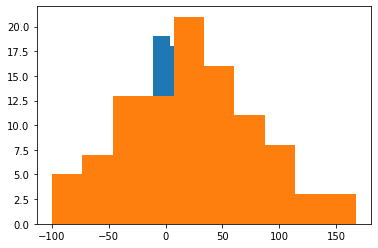

In [4]:
plt.hist(A)
plt.hist(B)

In [5]:
data_group = pd.DataFrame()
data_group['value'] = A.tolist() +  B.tolist() 
data_group['group'] = ['A']*len(A)+['B']*len(B)
data_group

,value,group
0,63.483642,A
1,2.417810,A
2,-3.536954,A
3,-68.599557,A
4,10.751461,A
...,...,...
195,27.703331,B
196,26.636666,B
197,66.925797,B
198,46.579689,B


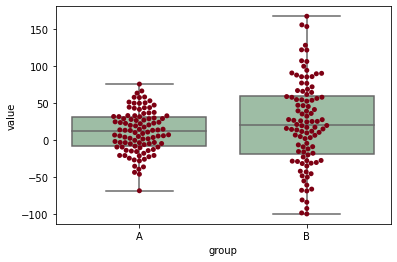

In [6]:
ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()

Задание № 2 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [7]:
np.random.seed(11)
A_1 = stats.norm.rvs(scale=30, loc=11, size=100)
B_1 = A_1 + stats.norm.rvs(scale=54, loc=11, size=100)

In [8]:
# Сравнение зависимых групп
stat, p = wilcoxon(A_1, B_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


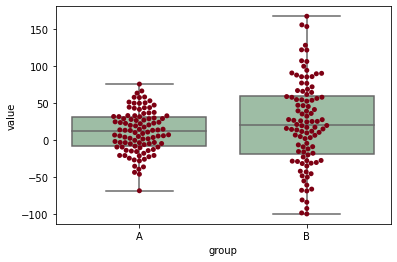

In [9]:
data_group_1 = pd.DataFrame()
data_group_1['value'] = A.tolist() +  B.tolist() 
data_group_1['group'] = ['A']*len(A)+['B']*len(B)
data_group_1
ax = sns.boxplot(x='group', y='value', data=data_group_1, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group_1, color='#7d0013')
plt.show()

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

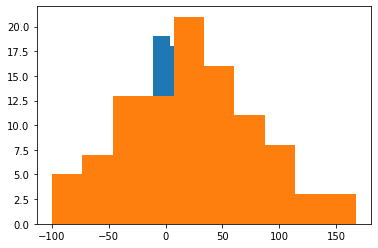

In [10]:
plt.hist(A_1)
plt.hist(B_1)

Задание № 3
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist` 

In [11]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [12]:
F, p = f_oneway(water ,nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


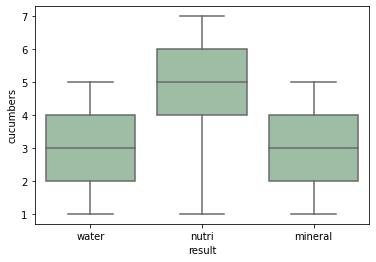

In [13]:
import seaborn as sns  
#Немного преобразуем данные
cucumbers = water + nutri + mineral
result = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['cucumbers'] = cucumbers
df_mid['result'] = result


ax = sns.boxplot(x='result', y='cucumbers', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

Как видно из визуализации, эффект применения удобрения, по сравнению с минералкой есть , огурцов больше.

Задача №4
# Cookie Cats

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`

In [14]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [21]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


ВЫВОД:

Ну судя по сгруппированным результатам теста по версиям игры, 
больше всего игроков возвращались после установки ворот на 40-ом уровне

In [70]:
# Группирую по условию по тем кто вернулся в игру и разделяю на тех кому поставили ворота на 30 и на тех кому на 40-м уровне
v_30_1 = data.loc[(data.version == 'gate_30') & (data.retention_7 == True) & (data.retention_1 == True)].filter(items = ['sum_gamerounds'])
v_40_1 = data.loc[(data.version == 'gate_40') & (data.retention_7 == True) & (data.retention_1 == True)].filter(items = ['sum_gamerounds'])

In [62]:
# Сравнение независимых групп
stat, p = mannwhitneyu(v_30_1, v_40_1) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=21165895.000, p=0.006
Разные распределения (отвергаем H0)


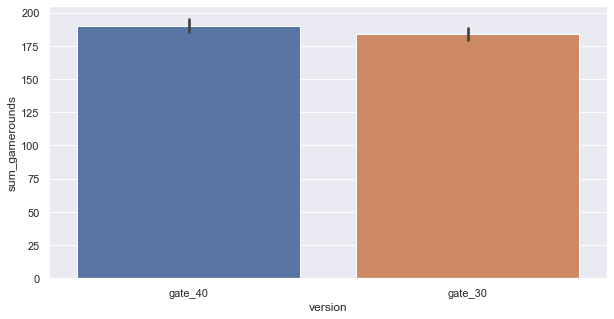

In [64]:
data_1 = data.loc[(data.retention_7 == True) & (data.retention_1 == True)].filter(items = ['sum_gamerounds', 'version'])
data_1
sns.barplot(x='version', y='sum_gamerounds', data=data_1);

Распределения отличаются, и судя по визуализации, тех кто вернулся в игру при установленных воротах 
на 40-м уровне больше по количеству.

In [69]:
# Группирую по условию по тем кто не вернулся в игру и разделяю на тех кому поставили ворота на 30 и на тех кому на 40-м уровне
v_30_2 = data.loc[(data.version == 'gate_30') & (data.retention_7 == False)].filter(items = ['sum_gamerounds'])
v_40_2 = data.loc[(data.version == 'gate_40') & (data.retention_7 == False)].filter(items = ['sum_gamerounds'])

In [67]:
# Сравнение независимых групп
stat, p = mannwhitneyu(v_30_2, v_40_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=670441023.000, p=0.146
Одинаковые распределения (не отвергаем H0)


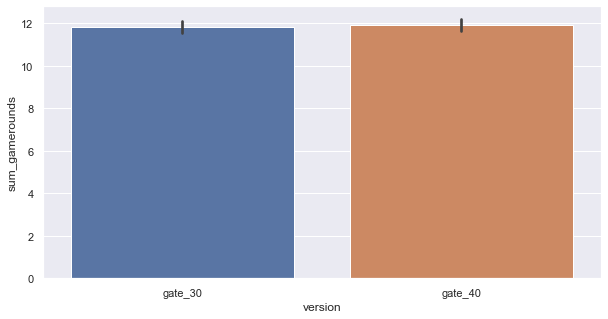

In [68]:
data_2 = data.loc[(data.retention_7 == False) & (data.retention_1 == False)].filter(items = ['sum_gamerounds', 'version'])
data_2
sns.barplot(x='version', y='sum_gamerounds', data=data_2);

Распределения одинаковые, значит те кто не вернулся, в любом из случаев установки ворот, не заинтересовался игрой.

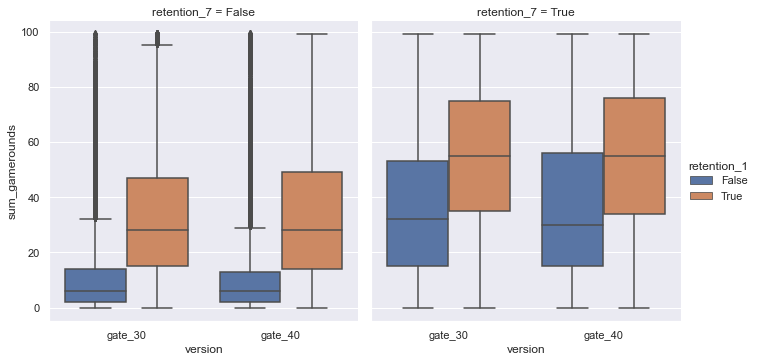

In [72]:
# Так же в пользу ворот на 40-м уровне говорит данная визуализация:
df = data.loc[data['sum_gamerounds'] < 100].copy();

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);   

Задание № 5:
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.



## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [15]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет

#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [16]:
pokemon_ = pokemon.filter(items = [ 'pid','Name','Class 1','Class 2','Attack']).loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 1'] == 'Grass')].set_index('pid')
pokemon_

,Name,Class 1,Class 2,Attack
pid,,,,
1,Bulbasaur,Grass,Poison,49
2,Ivysaur,Grass,Poison,62
3,Venusaur,Grass,Poison,82
4,Mega Venusaur,Grass,Poison,100
49,Oddish,Grass,Poison,50
...,...,...,...,...
769,Amaura,Rock,Ice,59
770,Aurorus,Rock,Ice,77
774,Carbink,Rock,Fairy,50


In [17]:
#Удалаяем строки  где  покемоны, относятся к обоим классам Rock и Grass
pokemon_.drop(pokemon_[(pokemon_['Class 1'] == 'Rock') & (pokemon_['Class 2'] == 'Grass') | (pokemon_['Class 1'] == 'Grass') & (pokemon_['Class 2'] == 'Rock')].index, inplace=True)
pokemon_1 = pokemon_.filter(items = [ 'pid','Name','Class 1','Attack'])
pokemon_1

,Name,Class 1,Attack
pid,,,
1,Bulbasaur,Grass,49
2,Ivysaur,Grass,62
3,Venusaur,Grass,82
4,Mega Venusaur,Grass,100
49,Oddish,Grass,50
...,...,...,...
769,Amaura,Rock,59
770,Aurorus,Rock,77
774,Carbink,Rock,50


In [18]:
#видоизменяем таблицу
pokemon_melt = pokemon_1.melt(id_vars =['Class 1'], value_vars =['Attack'])
pokemon_melt

,Class 1,variable,value
0,Grass,Attack,49
1,Grass,Attack,62
2,Grass,Attack,82
3,Grass,Attack,100
4,Grass,Attack,50
...,...,...,...
107,Rock,Attack,59
108,Rock,Attack,77
109,Rock,Attack,50
110,Rock,Attack,100


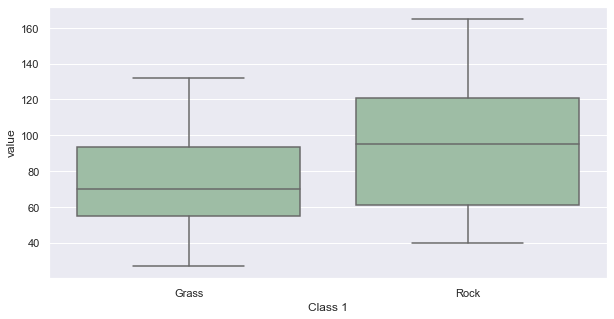

In [19]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту
ax = sns.boxplot(x='Class 1', y='value', data=pokemon_melt, color='#99c2a2')
#ax = sns.swarmplot(x='Class 1', y="value", data=pokemon_melt, color='#7d0013')
plt.show()

In [20]:
#Судя по визуализации, профессор Оук ошибся, покемоны в классе rock имеют более сильную обычную атаку, чем у покемонов в классе grass
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(pokemon_melt['Class 1'].isin(['Grass']),  pokemon_melt['Class 1'].isin(['Rock']))#проведём дисперсионный анализ
print(fvalue, pvalue)
alpha = 0.05  # Уровень значимости
if pvalue > alpha:
    print('Покемоны в классе grass не различаются с атакой в классе rock (не отвергаем H0)')
else:
    print('Покемоны в классе grass и  в классе rock имеют разные силы атаки (отклоняем H0)')

14.8 0.0001562385642083132
Покемоны в классе grass и  в классе rock имеют разные силы атаки (отклоняем H0)
